In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date, соответствует названию папки, где лежит папка с пользователем).

In [3]:
first_folder = os.listdir("/content/drive/My Drive/Data for Collab/Carpov_Courses/")[0]#получаем первую папку
first_folder

'data'

In [4]:
dates = os.listdir("/content/drive/My Drive/Data for Collab/Carpov_Courses/{}".format(first_folder))#получаем папки, вложенные в первую
dates

['2020-12-09',
 '2020-12-05',
 '2020-12-07',
 '2020-12-04',
 '2020-12-03',
 '2020-12-08',
 '2020-12-06']

In [88]:
final_df = pd.DataFrame()#создаем пустой DF для первой итерации соединения таблиц
for date in dates:
  
  names = os.listdir("/content/drive/My Drive/Data for Collab/Carpov_Courses/{}/{}".format(first_folder, date))#получаем список папок, вложенных в папку с датой
  
  for name in names:
    path = "/content/drive/My Drive/Data for Collab/Carpov_Courses/{}/{}/{}".format(first_folder, date, name)#путь до последней папки
    
    file_path = path+'/'+os.listdir(path)[0]#путь к файлу в послденей папке
    
    current_df = pd.read_csv(file_path, index_col=0)#читаем файл в последгней папке
    current_df['name'] = name#добавляем колонку с именем
    current_df['date'] = date#добавляем колонку с датой
    
    df = pd.concat([final_df, current_df],ignore_index=True)#сливаем два датафрейма, повторяем, пока не закончатся файлы
    df.reset_index(drop=True, inplace=True)
    final_df = df
    

In [6]:
final_df.shape

(161, 4)

In [7]:
final_df.tail()

,product_id,quantity,name,date
156,50,5,Rostislav_Petrov,2020-12-08
157,56,4,Vasiliy_Fedorov,2020-12-06
158,97,3,Vasiliy_Fedorov,2020-12-06
159,79,3,Vasiliy_Fedorov,2020-12-06
160,29,5,Vasiliy_Fedorov,2020-12-06


In [8]:
final_df['quantity'].sum()

480

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке

In [9]:
final_df.groupby('name', as_index=False) \
             .agg({'quantity':'sum'}) \
             .sort_values(by='quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)
Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

In [11]:
final_df.groupby('product_id', as_index=False) \
.agg({'quantity':'sum'}) \
.sort_values(by='quantity', ascending=False)

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


In [13]:
top_10 = final_df.groupby('product_id', as_index=False) \
.agg({'quantity':'sum'}) \
.sort_values(by='quantity', ascending=False).head(10)
top_10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


In [23]:
top_10.query('product_id == 56')['quantity']

42    18
Name: quantity, dtype: int64

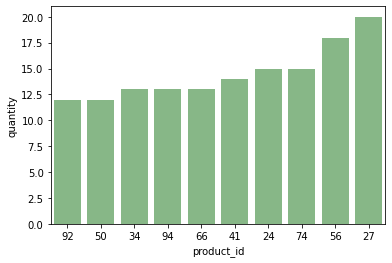

In [31]:
_ = sns.barplot(x='product_id', y='quantity', data = top_10, color='green', alpha=0.5, order=top_10.sort_values('quantity').product_id)

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [33]:
quantities_by_days = final_df.groupby('date', as_index=False) \
.agg({'quantity':'sum'}) \
.sort_values(by='quantity', ascending=False)
quantities_by_days

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


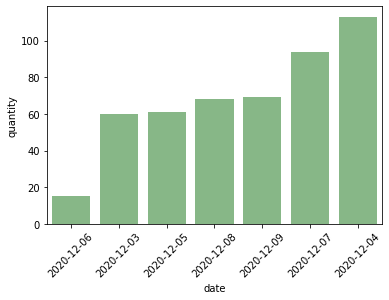

In [41]:
plot = sns.barplot(x='date', y='quantity', data = quantities_by_days, color='green', alpha=0.5, order=quantities_by_days \
                .sort_values('quantity').date)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=45)

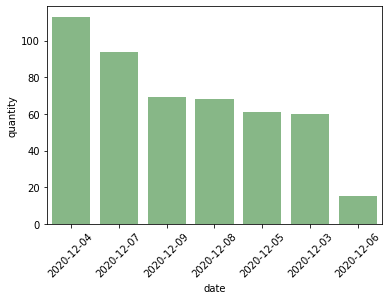

In [42]:
plot = sns.barplot(x='date', y='quantity', data = quantities_by_days, color='green', alpha=0.5)
locs, labels = plt.xticks()
_ = plt.setp(labels, rotation=45)

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 



In [89]:
final_wo_quant = final_df.drop(['quantity'], axis=1)#выбросили столбец с количеством покупок

In [95]:
ff = final_wo_quant.drop_duplicates()#убрали строки, где совпадает дата, имя и product_id, т.е. избавились от одинаковых покупок в один день

In [102]:
ff.groupby(['name','product_id'], as_index=False).agg({'date':'count'}).query('date>1')#выбрали записи, в которых совпадает имя, product_id и разная дата

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
